In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_ds="/content/drive/MyDrive/datasetskincancer/data/train"
test_ds="/content/drive/MyDrive/datasetskincancer/data/test"


# Data preprocessing
****

In [4]:
os.listdir('/content/drive/MyDrive/datasetskincancer/data/train')

['benign', 'malignant']

In [5]:
batch_size=32
img_size=224

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


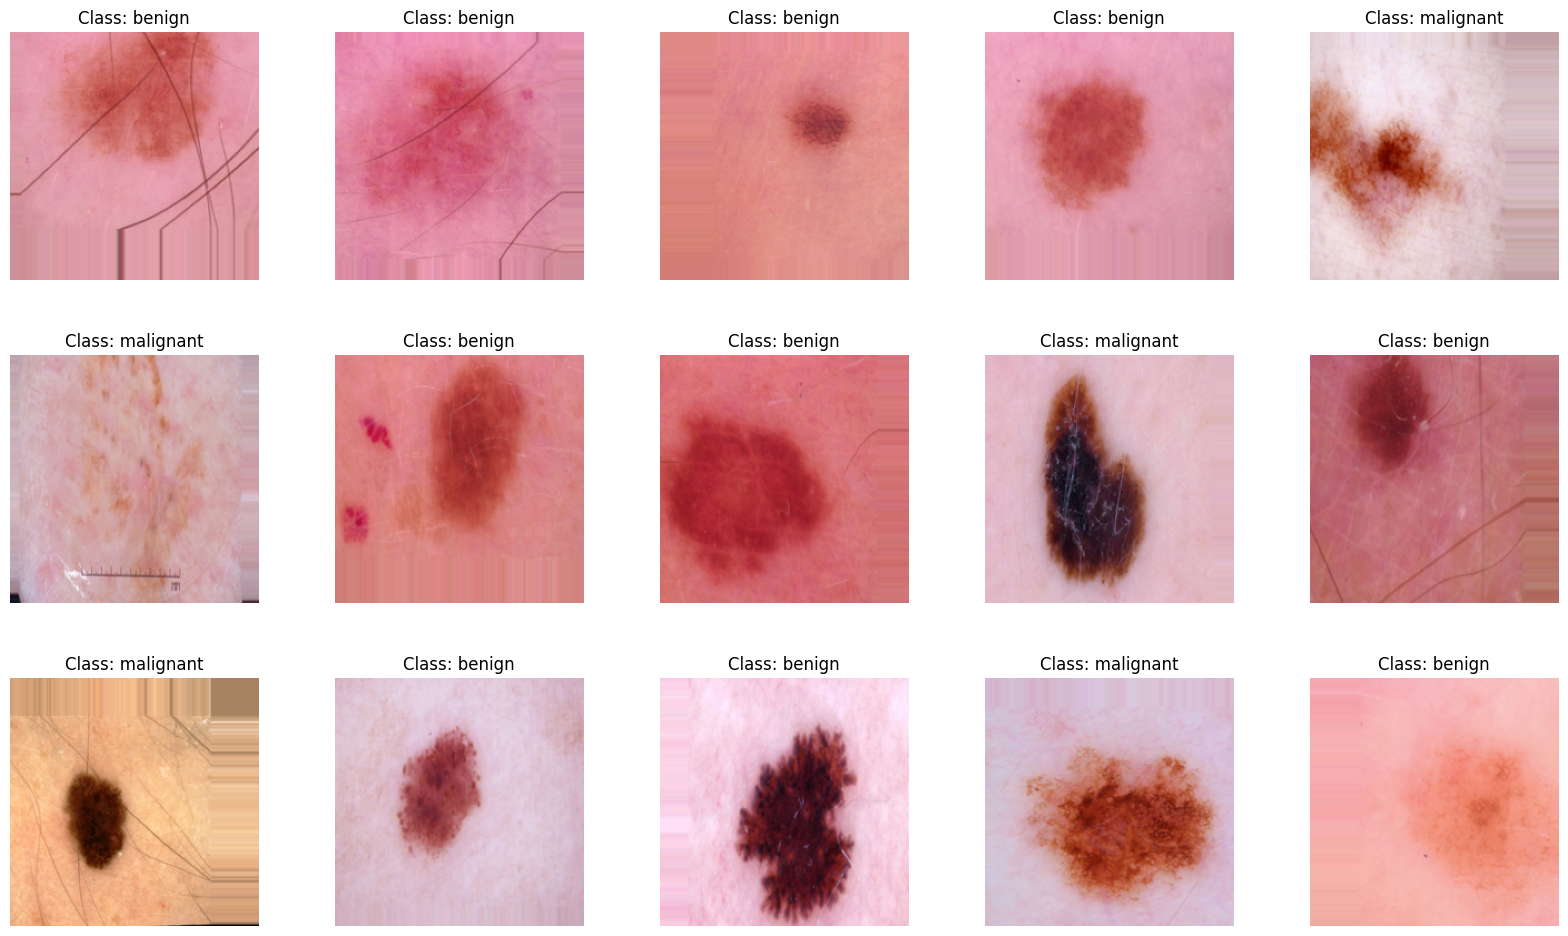

In [7]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [8]:
print(len(train_generator))
print(len(test_ds))


83
50


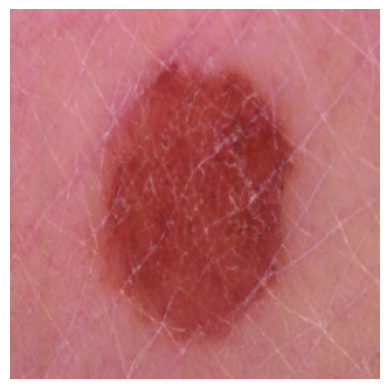

In [9]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/datasetskincancer/data/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
from keras.layers import MaxPool2D

In [11]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build googlenwet Model

#   Model summary

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input image size (DenseNet121 expects 224x224 pixels)
input_shape = (224, 224, 3)

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a Sequential model and add the DenseNet121 base model and custom classification layers
# Define the input layer with the specified shape
input_tensor = Input(shape=input_shape)

# Connect the base model to the input layer
x = base_model(input_tensor)

# Add the remaining layers
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=x)

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,168,962 (27.35 MB)

 Trainable params: 131,458 (513.51 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 593s 6s/step - accuracy: 0.4865 - loss: 1.0904 - val_accuracy: 0.4970 - val_loss: 0.7475
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 622ms/step - accuracy: 0.4946 - loss: 1.0190 - val_accuracy: 0.5303 - val_loss: 0.6998
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 53s 598ms/step - accuracy: 0.5242 - loss: 0.9106 - val_accuracy: 0.5818 - val_loss: 0.6752
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 55s 604ms/step - accuracy: 0.5313 - loss: 0.8949 - val_accuracy: 0.6121 - val_loss: 0.6529
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 631ms/step - accuracy: 0.5451 - loss: 0.8479 - val_accuracy: 0.6379 - val_loss: 0.6355
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 54s 610ms/step - accuracy: 0.5440 - loss: 0.8696 - val_accuracy: 0.6652 - val_loss: 0.6181
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 54s 601ms/step - accuracy: 0.5804 - loss: 0.7994 - val_accuracy: 0.6788 - val_loss: 0.5985
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 56s 619ms/step - accuracy: 0.5524 - loss: 0.8642 - val_accuracy: 

In [22]:
n_categories = len(os.listdir('/content/drive/MyDrive/datasetskincancer/data/test'))# number of categories print(n_categories)

In [23]:
n_categories

2

In [24]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.490330,1.063690,0.496970,0.747504
1,0.505119,0.988950,0.530303,0.699846
2,0.519909,0.915232,0.581818,0.675218
3,0.533561,0.900659,0.612121,0.652901
4,0.540387,0.864929,0.637879,0.635510


from matplotlib import pyplot as plt
_df_0['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['val_accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('val_accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('val_accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
_df_11['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

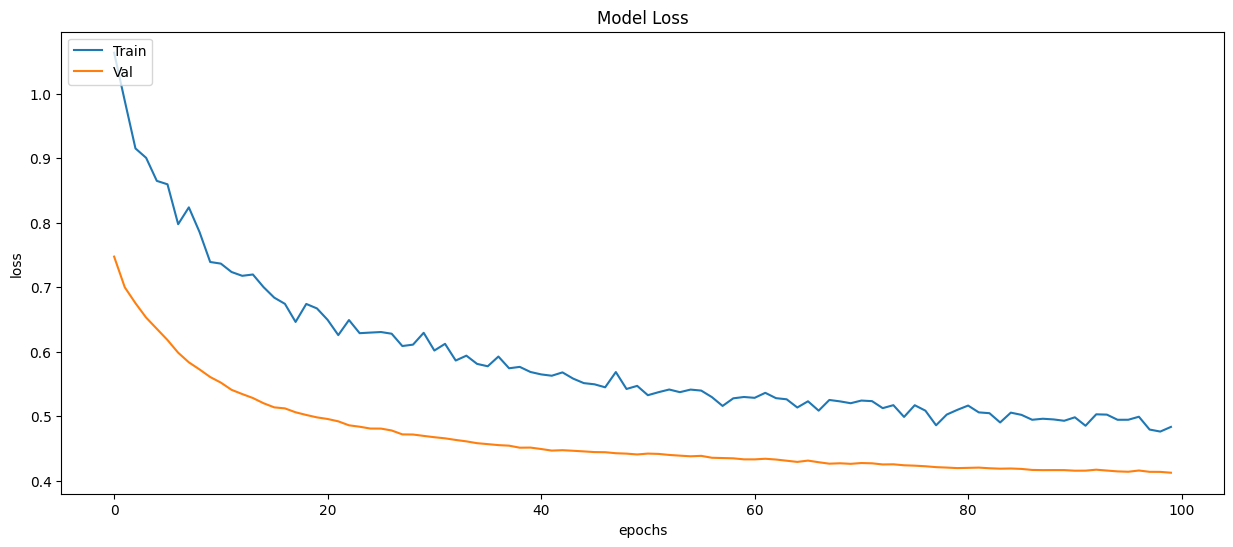

In [25]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

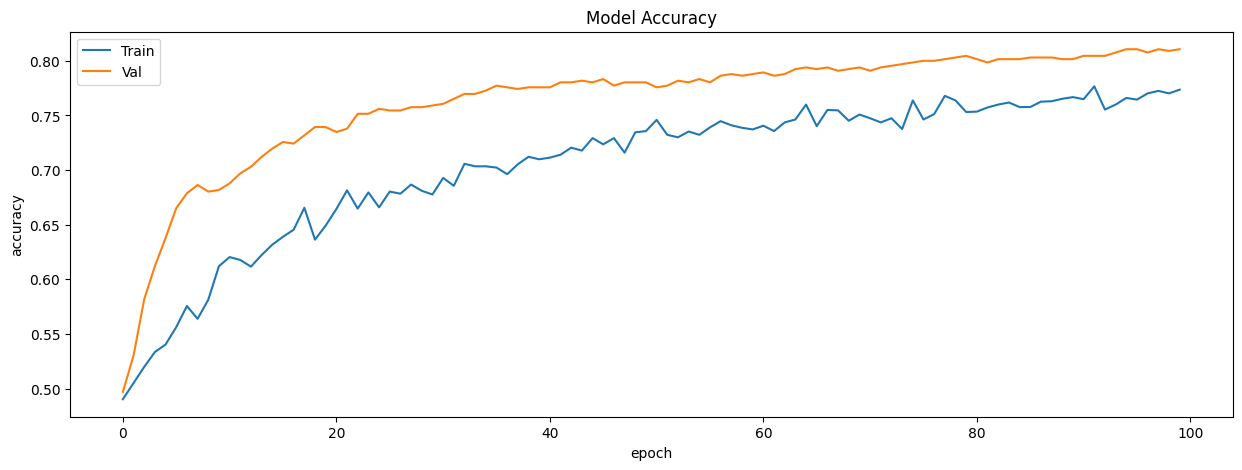

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 661ms/step


In [28]:
results =model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.8557 - loss: 0.3505


In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       360
           1       0.85      0.71      0.77       300

    accuracy                           0.81       660
   macro avg       0.82      0.80      0.81       660
weighted avg       0.82      0.81      0.81       660



In [30]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

In [31]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.79
Recall: 0.90
Specificity: 0.90
F1 Score: 0.84
FDR: 0.15
FNR: 0.29
FPR: 0.10

Additional Metrics for Class 1:
Precision: 0.85
Recall: 0.71
Specificity: 0.90
F1 Score: 0.77
FDR: 0.15
FNR: 0.29
FPR: 0.10

Average Metrics:
Precision: 0.82
Recall: 0.80
F1 Score: 0.81
AUC: 0.80
Specificity: 0.90
FDR: 0.15
FNR: 0.29
FPR: 0.10


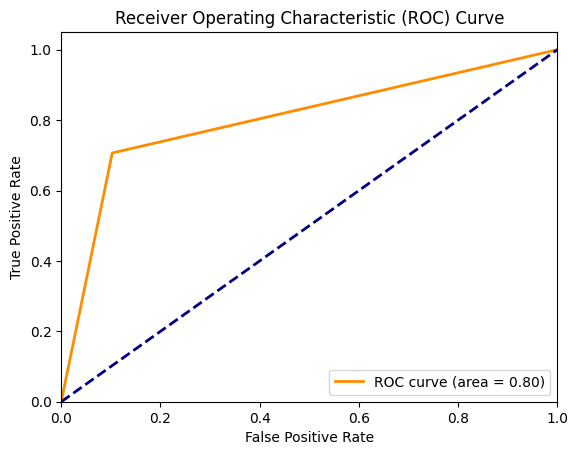

In [32]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


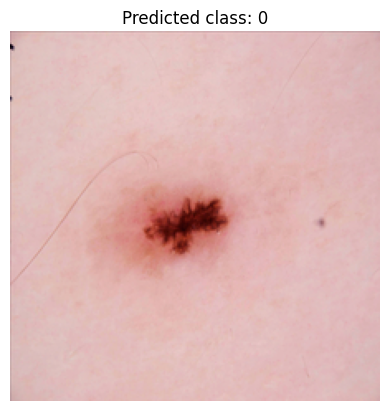

In [33]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/datasetskincancer/data/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [34]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.76332814
Predicted class for 2.jpg : benign
Class probability: 0.87563473
Predicted class for 3.jpg : benign
Class probability: 0.8740917
Predicted class for 4.jpg : benign
Class probability: 0.7740137
Predicted class for 5.jpg : benign
Class probability: 0.80846995
Predicted class for 6.jpg : benign
Class probability: 0.70359105
Predicted class for 7.jpg : malignant
Class probability: 0.6728416
Predicted class for 8.jpg : benign
Class probability: 0.91042906
Predicted class for 9.jpg : benign
Class probability: 0.77698135
Predicted class for 10.jpg : benign
Class probability: 0.92281
Predicted class for 11.jpg : malignant
Class probability: 0.6221771
Predicted class for 12.jpg : benign
Class probability: 0.87511706
Predicted class for 13.jpg : benign
Class probability: 0.62251663
Predicted class for 14.jpg : benign
Class probability: 0.84809357
Predicted class for 15.jpg : benign
Class probability: 0.79303
Predicted class for 16.